In [1]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

CUSTOM_MODEL_PATH = os.path.join( "..", "..", "..", "pretrained_models/custom_dota.pt")


## Entrenar un Nuevo Modelo

Primero para describir el funcionamiento de entrenamiento de un modelo YOLOv8 mediante la librería ultralutics. Tendremos la opción de comenzar el entrenamiento con modelos preentrenados mediante el dataset COCO con hasta 80 clases realizando transferencia de aprendizaje. 

Para esto debemos disponer de un documento [YAML](https://docs.ultralytics.com/datasets/detect/lvis/?h=yaml#dataset-yaml) describiendo al menos las rutas de las imagenes de entrenamiento (train) y validación (val). Además de un listado con los nombres de las clases ordenadas por ID según las etiquetas del dataset a trabajar. 

Usando el método `train()` podremos declarar nuestro documento yaml con los arreglos de entrenamiento y validación, además de [**parámetros**](https://docs.ultralytics.com/modes/train/#train-settings) que queramos agregar al proceso de entrenamiento, como definir un optimizador o diferentes técnicas de aumento de datos. 

Como resultado, se creará un nuevo directorio con los resultados de nuestros entrenamientos, incluyendo los pesos en un archivo con su extensión `best.pt`, además de los resultados de las pruebas de validación y testeo.

In [ ]:
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='data.yaml', epochs=100, imgsz=640)

## Evaluar o Predecir un Resultado

Una vez contamos con un modelo pre-entrenado la librería Ultralytics nos da múltiples opciones para aplicar nuestro modelo ([Documentación](https://docs.ultralytics.com/modes/predict/#key-features-of-predict-mode)). 

In [55]:


# Load the pretrained model
model = YOLO(CUSTOM_MODEL_PATH)

# Define path to the image file
source = 'test.jpg'

# Run inference on the source
results = model.track(source, show_labels = False)  # list of Results objects


image 1/1 /home/pepe/Documents/Titulo/vehicle_video_trajectory_extractor/research/object_detection_methods/Yolo_v8_method/test.jpg: 704x1024 1 large vehicle, 108 small vehicles, 145.7ms
Speed: 4.8ms preprocess, 145.7ms inference, 1.4ms postprocess per image at shape (1, 3, 704, 1024)


Los resultados entregan una lista de objetos de todas las imágenes evaluadas, estos contienen un grupo importante de métodos y variables con los que trabajar, algunos de los más importantes son:

- `orig_img`: Un arreglo con la imagen original de entrada.
- `orig_shape`: Las dimensiones del arreglo de la imagen original 
- `boxes`: un objeto con los metadatos de las detecciones (cls, conf, data).
    - cls: un tensor de una dimensión, con las clases de cada detección.
    - conf: un tensor de una dimensión, con los valores de confianza de cada detección. 
    - data: un tensor de dos dimensiones con los datos de cada detección, cada uno siguiendo un formato x1,y1,x2,y2,conf,cls
- `show()`:un método que llama una ventana de cv2 para mostrar los resultados
- `plot`: un arreglo cv2 con la imagen, sus detecciones y sus etiquetas
- `names`: los nombres de las clases
- etc.. 

**obs 1**: si se desea ver un listado completo de los métodos y variables, se recomienda usar la función `dir()` de python sobre el objeto que se desea analizar.  
**obs 2**: al trabajar con pytorch muchos de los resultados se entregan como tensores por sobre arrays, una diferencia clave es que los tensores cuentan con datos normalizados y con funciones para transformar datos de manera eficiente como lo es la función `cpu()`, qué lleva los datos a la memoria de la cpu para procesarlos de manera más rápida.

A modo de ejemplo podemos ver los datos de las detecciones:

In [62]:
results[0].boxes.data.cpu().numpy()

array([[     348.16,      332.39,      384.96,      349.96,      0.8718,           1],
       [     764.26,      333.54,      804.42,       351.5,     0.87084,           1],
       [     1077.2,      306.77,      1119.7,      323.41,      0.8701,           1],
       [     871.27,      437.18,      912.02,      454.18,     0.86944,           1],
       [     401.45,      335.83,      439.73,      352.75,     0.86828,           1],
       [     104.78,       356.5,      141.49,      373.14,     0.86739,           1],
       [     239.71,      330.84,      278.53,      348.78,     0.86448,           1],
       [     44.681,      356.25,      81.246,      372.91,     0.86383,           1],
       [     293.77,      333.98,      332.68,      351.96,     0.86383,           1],
       [     1075.7,      336.99,      1117.7,      356.04,     0.86306,           1],
       [     136.01,      330.26,       172.1,      346.85,     0.86121,           1],
       [     694.64,      360.35,      735.

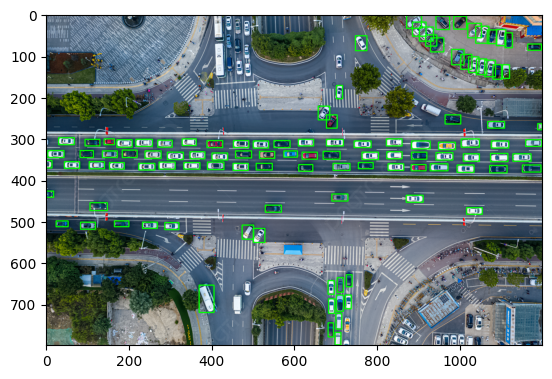

In [57]:
image = cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB)
boxes = results[0].boxes.data.cpu().numpy()

for box in boxes:
    x1, y1, x2, y2 = box[:4]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(image)